## Generación de Datos Sintéticos con Tendencia y Estacionalidad

En este ejemplo, generaremos datos sintéticos de velocidad y dirección del viento que incluyen:

    Tendencia: Un aumento gradual de la velocidad del viento a lo largo del tiempo.

    Estacionalidad: Variaciones periódicas en la velocidad del viento, simulando patrones estacionales.

    Ruido: Variaciones aleatorias para simular la naturaleza estocástica del viento.

Estos datos sintéticos nos permitirán practicar el análisis de tendencia, estacionalidad y el ajuste de distribuciones estadísticas.

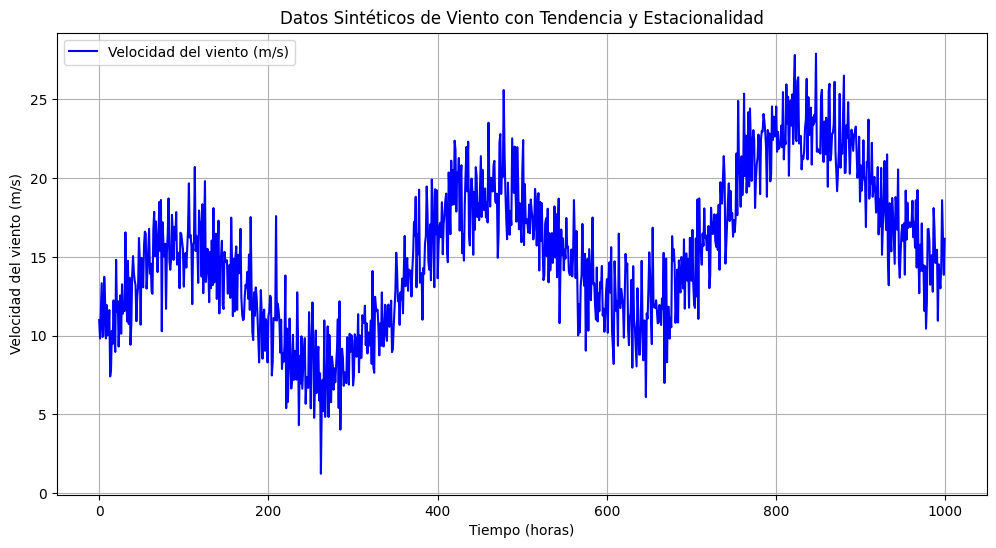

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from scipy.stats import weibull_min

# 1. Generar datos sintéticos con tendencia, estacionalidad y ruido
np.random.seed(42)
n = 1000  # Número de puntos de datos
time = np.arange(n)

# Tendencia lineal (aumento gradual de la velocidad del viento)
trend = 0.01 * time

# Estacionalidad (variación periódica)
seasonality = 5 * np.sin(2 * np.pi * time / 365)  # Ciclo anual

# Ruido aleatorio
noise = np.random.normal(0, 2, n)  # Ruido gaussiano

# Velocidad del viento sintética (combinación de tendencia, estacionalidad y ruido)
wind_speeds = 10 + trend + seasonality + noise  # Velocidad base de 10 m/s
wind_speeds = np.abs(wind_speeds)  # Asegurar que no haya valores negativos

# Dirección del viento sintética (distribución uniforme con ruido)
wind_directions = np.random.uniform(0, 360, n)  # Dirección base
wind_directions += 30 * np.sin(2 * np.pi * time / 180)  # Variación periódica
wind_directions = wind_directions % 360  # Asegurar que esté en el rango [0, 360)

# Crear un DataFrame con los datos sintéticos
data = pd.DataFrame({
    'time': time,
    'speed': wind_speeds,
    'direction': wind_directions
})

# 2. Visualizar la tendencia y estacionalidad
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['speed'], label="Velocidad del viento (m/s)", color='blue')
plt.title("Datos Sintéticos de Viento con Tendencia y Estacionalidad")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Velocidad del viento (m/s)")
plt.legend()
plt.grid()
plt.show()

## **Análisis de Estacionalidad**

La estacionalidad es un componente clave en el análisis de datos de viento, ya que los patrones de viento pueden variar significativamente a lo largo del año. Para visualizar esta variación, dividimos los datos en cuatro estaciones:

1. **Primavera:** Marzo, Abril, Mayo.
2. **Verano:** Junio, Julio, Agosto.
3. **Otoño:** Septiembre, Octubre, Noviembre.
4. **Invierno:** Diciembre, Enero, Febrero.

Cada estación se grafica por separado para observar cómo cambia la velocidad del viento a lo largo del año. Esto nos permite identificar patrones estacionales, como:

- **Verano:** Posiblemente con velocidades más altas debido a condiciones climáticas específicas.
- **Invierno:** Posiblemente con velocidades más bajas o más variables.

Este análisis es fundamental para la planificación de proyectos eólicos, ya que la energía generada por turbinas eólicas depende directamente de la velocidad del viento.

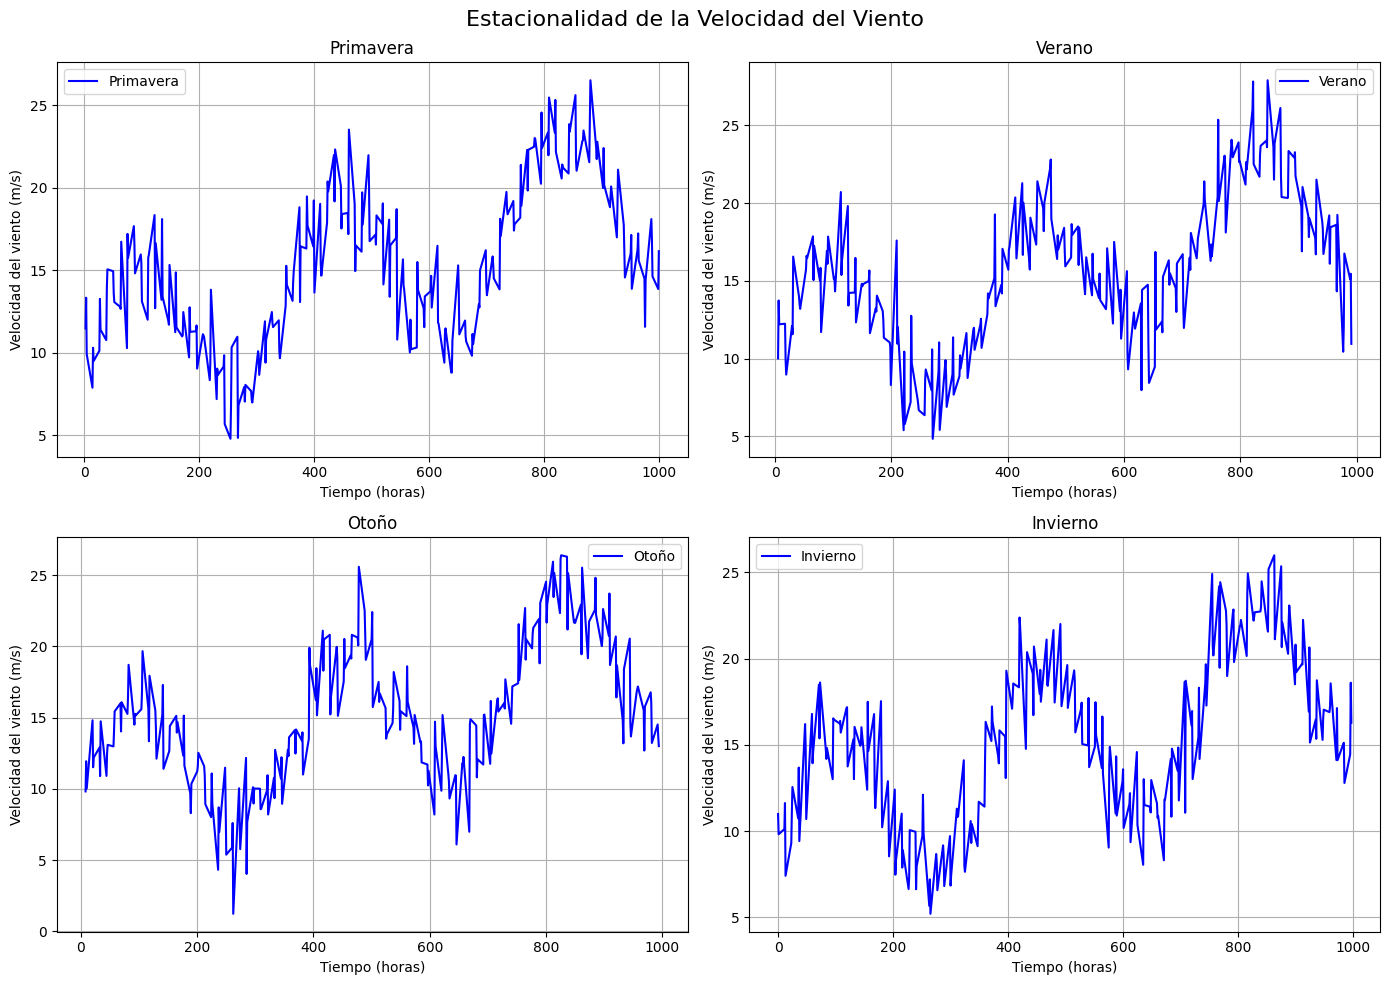

In [9]:
# 6. Visualizar la estacionalidad por paneles (cada estación)

# Definir las estaciones
estaciones = {
    "Primavera": [3, 4, 5],   # Marzo, Abril, Mayo
    "Verano": [6, 7, 8],       # Junio, Julio, Agosto
    "Otoño": [9, 10, 11],      # Septiembre, Octubre, Noviembre
    "Invierno": [12, 1, 2]     # Diciembre, Enero, Febrero
}

# Crear una columna de "mes" en los datos
data['month'] = (data['time'] % 12) + 1  # Simular meses (1 a 12)

# Crear una figura con subgráficos para cada estación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Estacionalidad de la Velocidad del Viento", fontsize=16)

# Graficar cada estación en un subgráfico
for i, (estacion, meses) in enumerate(estaciones.items()):
    ax = axes[i // 2, i % 2]  # Seleccionar el subgráfico correspondiente
    datos_estacion = data[data['month'].isin(meses)]  # Filtrar datos por estación
    ax.plot(datos_estacion['time'], datos_estacion['speed'], label=estacion, color='blue')
    ax.set_title(estacion)
    ax.set_xlabel("Tiempo (horas)")
    ax.set_ylabel("Velocidad del viento (m/s)")
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

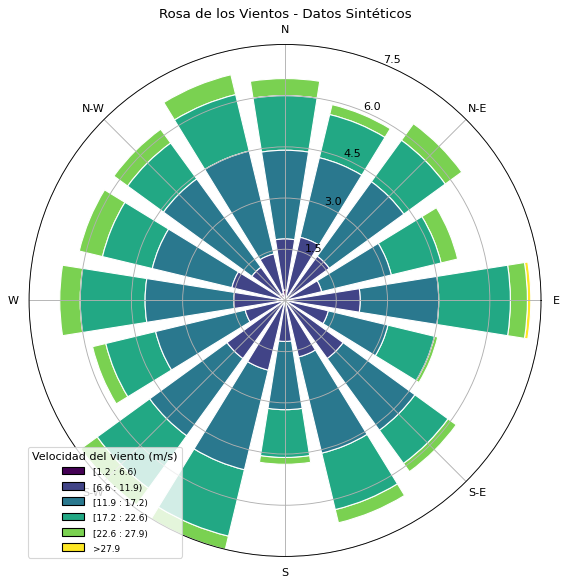

In [8]:
# 3. Gráfico de la rosa de los vientos con datos sintéticos
ax = WindroseAxes.from_ax()
ax.bar(data['direction'], data['speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Velocidad del viento (m/s)")
plt.title("Rosa de los Vientos - Datos Sintéticos")
plt.show()

## Ajuste de la Distribución de Weibull

La distribución de Weibull es ampliamente utilizada para modelar la velocidad del viento debido a su flexibilidad para describir diferentes patrones de variación. La distribución de Weibull tiene dos parámetros clave:

    Parámetro de forma (k): Controla la forma de la distribución. Valores de k < 1 indican una distribución con cola larga, mientras que k > 1 indica una distribución más concentrada.

    Parámetro de escala (A): Controla la escala de la distribución, relacionada con la velocidad media del viento.

El ajuste de la distribución de Weibull se realiza utilizando la función weibull_min de la librería scipy.stats

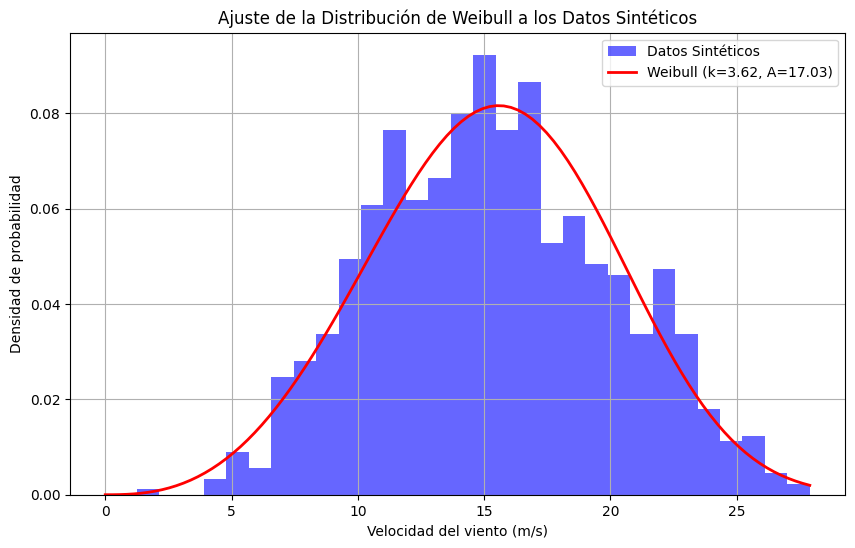

In [4]:
# 4. Ajustar la distribución de Weibull a los datos sintéticos
params = weibull_min.fit(data['speed'], floc=0)  # Ajustar la distribución
shape_param, loc_param, scale_param = params

# Generar valores teóricos de la distribución de Weibull
x = np.linspace(0, np.max(data['speed']), 100)
pdf = weibull_min.pdf(x, shape_param, loc=loc_param, scale=scale_param)

# Graficar el histograma de los datos y la distribución de Weibull ajustada
plt.figure(figsize=(10, 6))
plt.hist(data['speed'], bins=30, density=True, alpha=0.6, color='blue', label="Datos Sintéticos")
plt.plot(x, pdf, 'r-', lw=2, label=f"Weibull (k={shape_param:.2f}, A={scale_param:.2f})")
plt.title("Ajuste de la Distribución de Weibull a los Datos Sintéticos")
plt.xlabel("Velocidad del viento (m/s)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()

## Bondad de Ajuste

La bondad de ajuste es una medida de qué tan bien se ajusta la distribución de Weibull a los datos observados. Para evaluar la bondad de ajuste, utilizaremos:

    Visualización: Compararemos el histograma de los datos con la curva de la distribución de Weibull ajustada.

    Métricas Estadísticas: Calcularemos el coeficiente de determinación (R²) para cuantificar la bondad de ajuste.

In [7]:
# 5. Calcular la bondad de ajuste (R²) comparando PDFs

# Calcular el histograma normalizado de los datos (PDF empírica)
hist, bin_edges = np.histogram(data['speed'], bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centros de los bins

# Calcular la PDF teórica de Weibull en los centros de los bins
weibull_pdf = weibull_min.pdf(bin_centers, shape_param, loc=loc_param, scale=scale_param)

# Calcular el coeficiente de determinación (R²) entre el histograma y la PDF teórica
r2 = r2_score(hist, weibull_pdf)
print(f"Coeficiente de determinación (R²): {r2:.4f}")


Coeficiente de determinación (R²): 0.9209


Evaluación de la Bondad de Ajuste

El coeficiente de determinación (R²) es una métrica que indica qué tan bien se ajusta la distribución de Weibull a los datos. Un valor de R² cercano a 1 indica un buen ajuste, mientras que un valor cercano a 0 indica un ajuste pobre.

En este ejemplo, el valor de R² se calcula comparando los datos observados con los valores predichos por la distribución de Weibull ajustada. Un valor alto de R² confirma que la distribución de Weibull es adecuada para modelar los datos de velocidad del viento.